# Transformada de Fourier
**Autor:** Martínez Torres Marcos Alfonso, Facultad de Ingeniería, UNAM

Licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Teoría

### Transformada de Fourier

La transformada de Fourier nos permite transformar una función del dominio del tiempo al dominio de la frecuencia en forma continua. Dicha expresión viene siendo:<br><br>

Transformada de Fourier:
$$
F(\omega)=\int_{-\infty}^{\infty}f(t)\;e^{-i\omega t}\;dt
$$
Transformada inversa de Fourier (regresar al dominio del tiempo): 
$$
f(t)=\frac{1}{2\pi}\int_{-\infty}^{\infty}F(\mathscr{f})\;e^{i\omega t}\;d\mathscr{f}
$$
recordar que $\omega = 2\pi f = \frac{2\pi}{T}$

### Transformada discreta de Fourier (DFT)

Dada una señal de tiempo discreto f[n], la transformada de Fourier de tiempo discreto DFT de f[n] se define como:
$$
F(\Omega) = \sum_{n = -\infty}^{\infty} f[n]e^{-i\Omega n}
$$
La DFT $F(\Omega)$ es, en general, una función valuada en complejos de la variable real $\Omega$ (la variable frecuencia). Observe que $F(\Omega)$ es una contraparte natural de tiempo discreto de $F(\omega)$, donde la integral se reemplaza por una sumatoria. La omega mayúscula ($\Omega$) se utiliza para que la variable frecuencia distinga entre los casos de tiempo continuo y de tiempo discreto.<br><br>
**NOTA**: En la implementación práctica de la Transformada de Fourier, se utiliza comúnmente el algoritmo de Fast Fourier Transform (FFT) en lugar de la fórmula analítica. El FFT es un método numérico eficiente (basado en la transformada discreta de Fourier) que reduce significativamente la complejidad computacional, permitiendo calcular la transformada de Fourier de manera rápida y precisa para señales discretas

## Ejemplo



Del ejercicio 3.1 de la notas de Anguino<br>
Obtener la transformada de fourier de f(t).
$$
f(t) = \begin{cases}
e^{-\alpha t} & t > 0 \\
0 & t \leq 0
\end{cases}
$$

### Solución

Se importan las bibliotecas de Python
* *numpy* : Permite crear y gestionar arreglos multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel que operan sobre estos arreglos. El sitio oficial es https://numpy.org/
* *matplotlib* : Permite crear visualizaciones estáticas, animadas e interactivas en 2D y 3D. El sitio oficial es https://matplotlib.org/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Definición de aspectos básicos

Se define la función en la que se trabajará
$$
f(t) = \begin{cases}
e^{-\alpha t} & t > 0 \\
0 & t \leq 0
\end{cases}
$$

In [2]:
# Definición de la función a trozos
def f(t):
    return np.where(t > 0, np.exp(-a*t), 0)
# La función de numpy np.where actúa por asi decirlo como una condición if
# La función retorna 0 cuando t < 0, y regresa e^(-at) cuando t > 0

In [3]:
# Coeficiente que afecta a la variable t (tiempo)
a = 1
# Valor inicial del intervalo
ti = 0
# Valor final del intervalo
tf = 10
# tasa de muestreo
sr = 50
#Intervalo de muestreo
ts = 1/sr

In [4]:
# Vector tiempo
tiempo = np.arange(ti,tf,ts)
# Cantidad de muestras
N = len(tiempo)
print(N/2)

250.0


##### Aplicacion de la transformada de Fourier (fft)

La libreria "*numpy*" tiene el modulo "*numpy.fft*"  el cual incluye un conjunto básico de rutinas para la implementación de la **Transformada discreta de Fourier**. La documentacion de numpy contiene mas información información al respecto https://numpy.org/doc/stable/reference/routines.fft.html <br><br>
**NOTA:** El módulo SciPy "*scipy.fft*" es un superconjunto más completo de "*numpy.fft*".

Calculamos la transformada discreta de Fourier unidimensional de la siguiente forma, introduciendo unicamente la función a trabajar, se pueden agregar otros parámetros opcionales que se omitiran en este caso.

In [5]:
# Aplicamos la transformada rapida de fourier a la función  
F = np.fft.fft(f(tiempo))*ts
# Transformada ordenada
F_ord = np.fft.fftshift(F)

Para mayor información sobre la implementación de "*np.fft.fft*" en la documentacion de "*numpy*" https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft

Transformamos el vector tiempo a un vector frecuencias usando la función np.fft.fftfreq

In [6]:
# Cálculo de las frecuencias
frecuencia  = np.fft.fftfreq(N,ts)
# Introducimos la cantidad de datos usados (N), que tambien establecimos como dimension de t
# Se puede establecer una variable para el espaciado de muestra (inverso de la frecuencia de muestreo). El valor predeterminado es 1.
#print(frecuencia)
# Frecuencia ordenadas
frecuencia_ord = np.fft.fftshift(frecuencia)
#print(frecuencia_ord)
frec_nyquist = frecuencia_ord[-1]
print(f'La frecuencia de Nyquist es: {frec_nyquist}')

La frecuencia de Nyquist es: 24.900000000000002


##### Aplicacion de la transformada de Fourier (Analítico)

In [7]:
# Transformada segun las notas
F_analitica = np.sqrt((a**2)+((2*np.pi*frecuencia_ord)**2))/((a**2)+((2*np.pi*frecuencia_ord)**2))

# Modulo de la transformada
F_mod = 1/np.sqrt((a**2)+((2*np.pi*frecuencia_ord)**2))

# Contenido de potencia de la transformada
F_pot = F_mod**2

# Fase de la transformada
F_phase = np.arctan((-2*np.pi*frecuencia_ord)/a)

# Parte Real de la transformada
F_R = a/((a**2)+((2*np.pi*frecuencia_ord)**2))

# Parte Imaginaria de la transformada
F_I = -(2*np.pi*frecuencia_ord)/((a**2)+((2*np.pi*frecuencia_ord)**2)) 

#### Gráficas

##### Gráficas de la función original

Graficamos la función original (en el dominio del tiempo) y su espectro de amplitud

<Figure size 640x480 with 0 Axes>

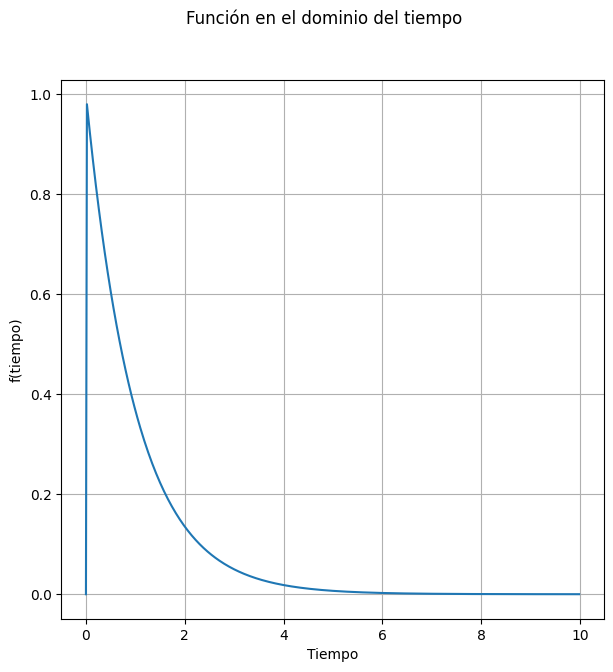

In [8]:
# Se crean las gráficas
fig1 = plt.figure()
plt.figure(figsize=(7,7))
plt.suptitle('Función en el dominio del tiempo')

plt.plot(tiempo,f(tiempo))
plt.xlabel('Tiempo')
plt.ylabel('f(tiempo)')
plt.grid(True)
plt.show()

##### Gráficas de la función en el dominio de la frecuencia (fft)

Gráficas de la parte real e imaginaria de la función en el dominio de la frecuencia con su respectivo espectro de amplitud y de fase

<Figure size 640x480 with 0 Axes>

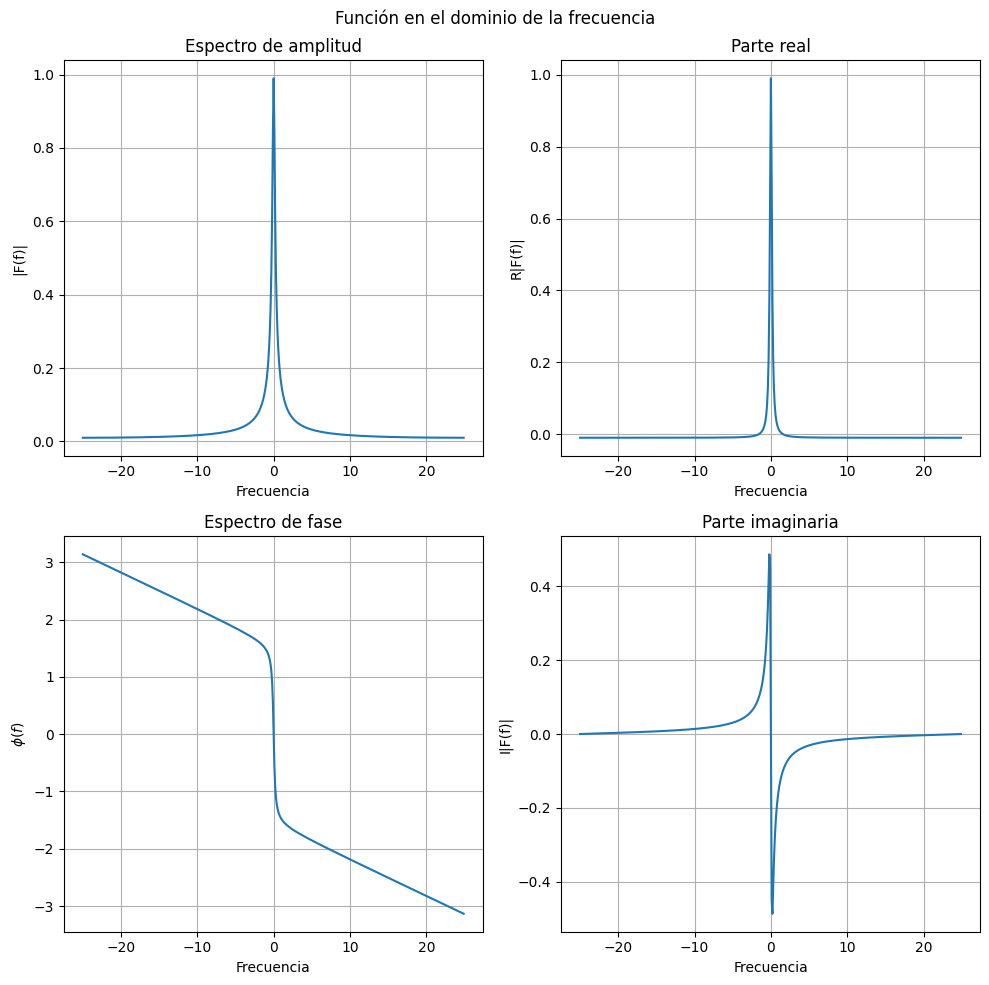

In [9]:
# Se crean las gráficas
fig2 = plt.figure()
plt.figure(figsize=(10,10))
plt.suptitle('Función en el dominio de la frecuencia')

#Gráfica del espectro de amplitud
plt.subplot(2,2,1)
plt.title('Espectro de amplitud')
plt.plot(frecuencia_ord,np.abs(F_ord))
plt.xlabel('Frecuencia')
plt.ylabel('|F(f)|')
plt.grid(True)

#Gráfica de la parte real
plt.subplot(2,2,2)
plt.title('Parte real')
plt.plot(frecuencia_ord,F_ord.real)
plt.xlabel('Frecuencia')
plt.ylabel('R|F(f)|')
plt.grid(True)

#Gráfica del espectro de fase
plt.subplot(2,2,3)
plt.title('Espectro de fase')
plt.plot(frecuencia_ord,np.angle(F_ord))
plt.xlabel('Frecuencia')
plt.ylabel(r'$\phi(f)$')
plt.grid(True)

#Gráfica de la parte imaginaria
plt.subplot(2,2,4)
plt.title('Parte imaginaria')
plt.plot(frecuencia_ord,F_ord.imag)
plt.xlabel('Frecuencia')
plt.ylabel('I|F(f)|')
plt.grid(True)

#Mostrar las gráficas
plt.tight_layout()
plt.show()

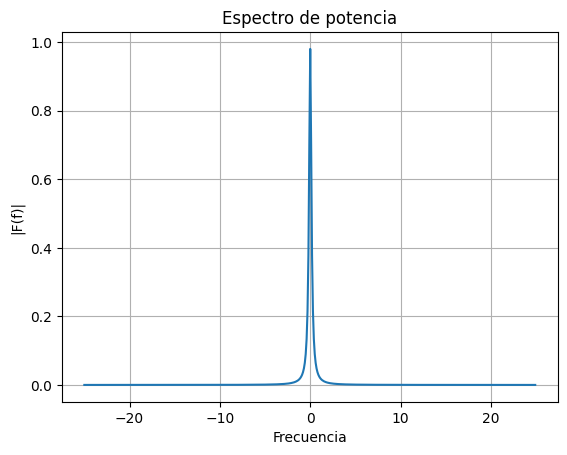

In [10]:
# Espectro de potencia
plt.title('Espectro de potencia')
plt.plot(frecuencia_ord,np.abs(F_ord)**2)
plt.xlabel('Frecuencia')
plt.ylabel('|F(f)|')
plt.grid(True)
plt.show()


##### Gráficas de la función en el dominio de la frecuencia (fft)

Gráficas hechas con los datos que vienen en el ejercicio 3.1 de las notas de Anguiano

<Figure size 640x480 with 0 Axes>

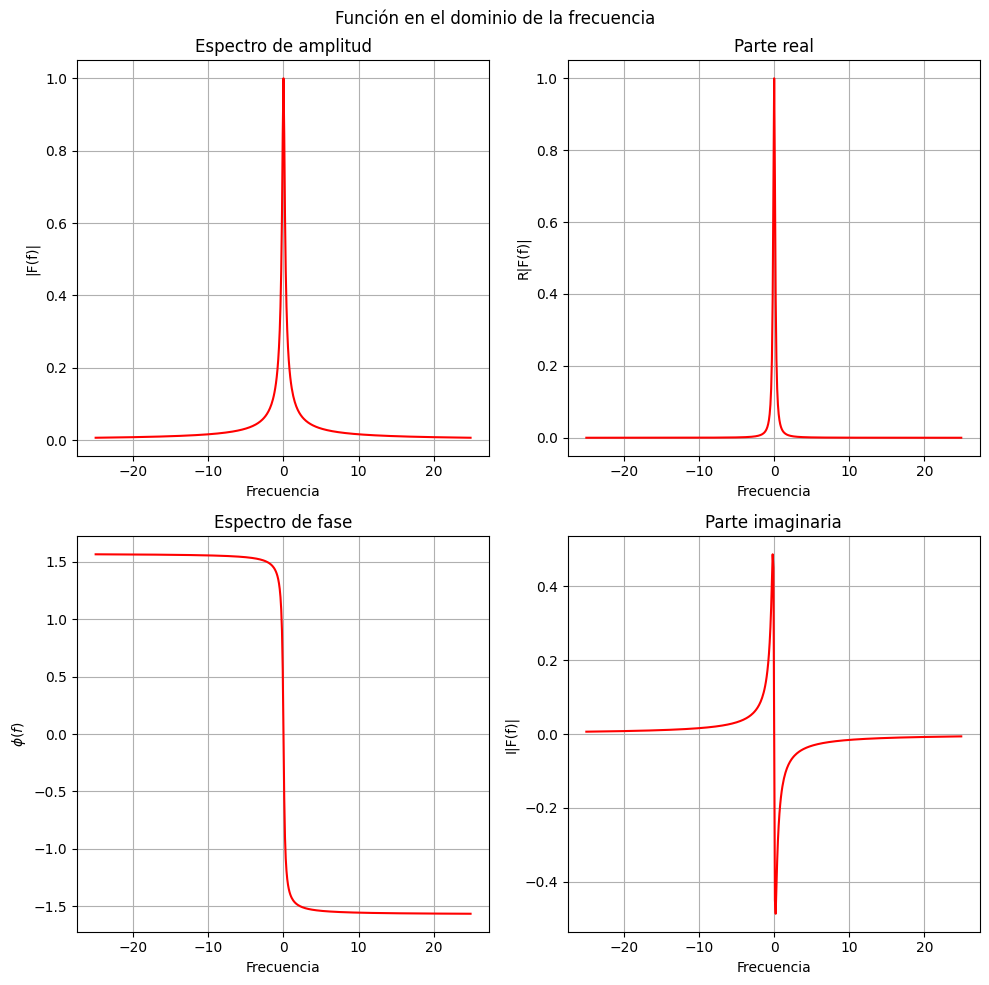

In [11]:
# Se crean las gráficas
fig2 = plt.figure()
plt.figure(figsize=(10,10))
plt.suptitle('Función en el dominio de la frecuencia')

#Gráfica del espectro de amplitud
plt.subplot(2,2,1)
plt.title('Espectro de amplitud')
plt.plot(frecuencia_ord,F_mod, c = 'red')
plt.xlabel('Frecuencia')
plt.ylabel('|F(f)|')
plt.grid(True)

#Gráfica de la parte real
plt.subplot(2,2,2)
plt.title('Parte real')
plt.plot(frecuencia_ord,F_R, c = 'red')
plt.xlabel('Frecuencia')
plt.ylabel('R|F(f)|')
plt.grid(True)

#Gráfica del espectro de fase
plt.subplot(2,2,3)
plt.title('Espectro de fase')
plt.plot(frecuencia_ord,F_phase, c = 'red')
plt.xlabel('Frecuencia')
plt.ylabel(r'$\phi(f)$')
plt.grid(True)

#Gráfica de la parte imaginaria
plt.subplot(2,2,4)
plt.title('Parte imaginaria')
plt.plot(frecuencia_ord,F_I, c = 'red')
plt.xlabel('Frecuencia')
plt.ylabel('I|F(f)|')
plt.grid(True)

#Mostrar las gráficas
plt.tight_layout()
plt.show()

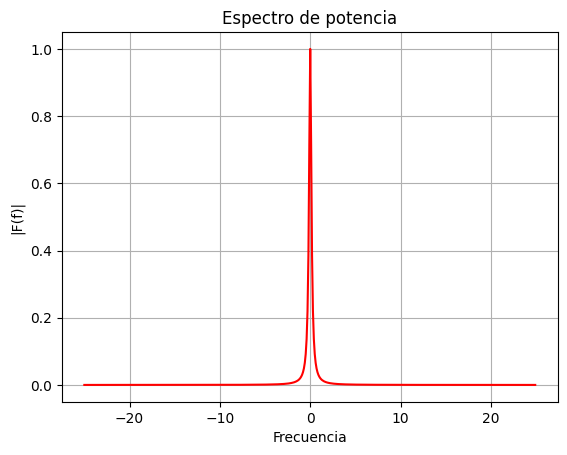

In [12]:
# Espectro de potencia
plt.title('Espectro de potencia')
plt.plot(frecuencia_ord,F_pot, c = 'red')
plt.xlabel('Frecuencia')
plt.ylabel('|F(f)|')
plt.grid(True)
plt.show()

##### Comparación

A continuación, se comparan las gráficas de la función analítica y su implementación con NumPy para identificar posibles diferencias o cambios.

##### Espectro de amplitud

<Figure size 640x480 with 0 Axes>

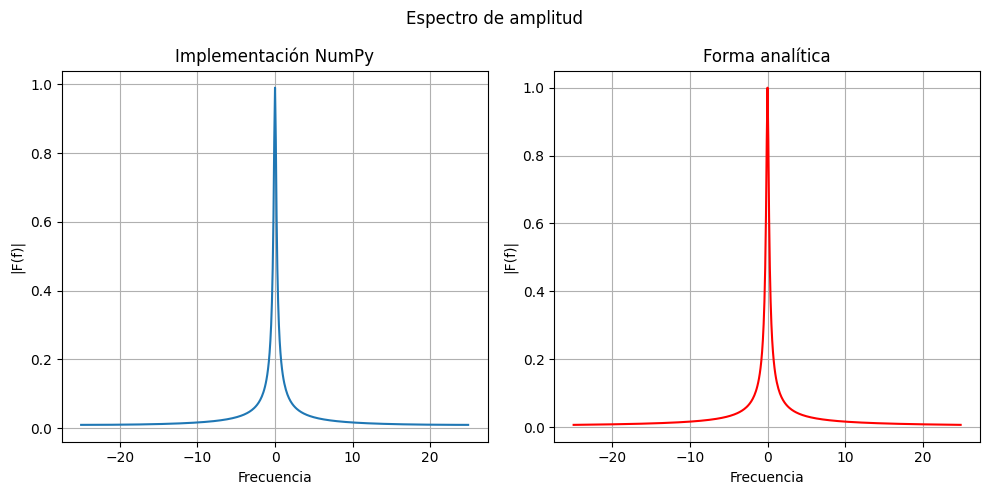

In [13]:
# Se crean las gráficas
fig2 = plt.figure()
plt.figure(figsize=(10,5))
plt.suptitle('Espectro de amplitud')

#Gráficas del espectro de amplitud
plt.subplot(1,2,1)
plt.title('Implementación NumPy')
plt.plot(frecuencia_ord,np.abs(F_ord))
plt.xlabel('Frecuencia')
plt.ylabel('|F(f)|')
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Forma analítica')
plt.plot(frecuencia_ord,F_mod, c = 'red')
plt.xlabel('Frecuencia')
plt.ylabel('|F(f)|')
plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

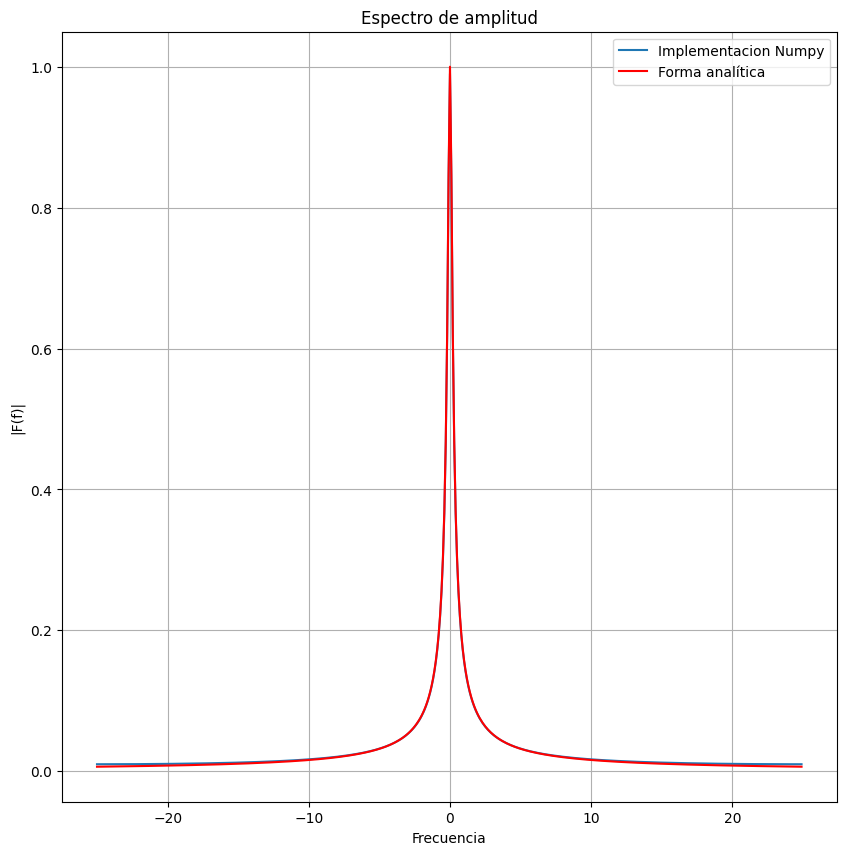

In [14]:
# Se crean las gráficas
fig2 = plt.figure()
plt.figure(figsize=(10,10))
plt.title('Espectro de amplitud')
plt.plot(frecuencia_ord,np.abs(F_ord), label = 'Implementacion Numpy')
plt.plot(frecuencia_ord,F_mod, c  ='red', label = 'Forma analítica')
plt.xlabel('Frecuencia')
plt.ylabel('|F(f)|')
plt.grid(True)
plt.legend()
plt.show()

##### Parte real

<Figure size 640x480 with 0 Axes>

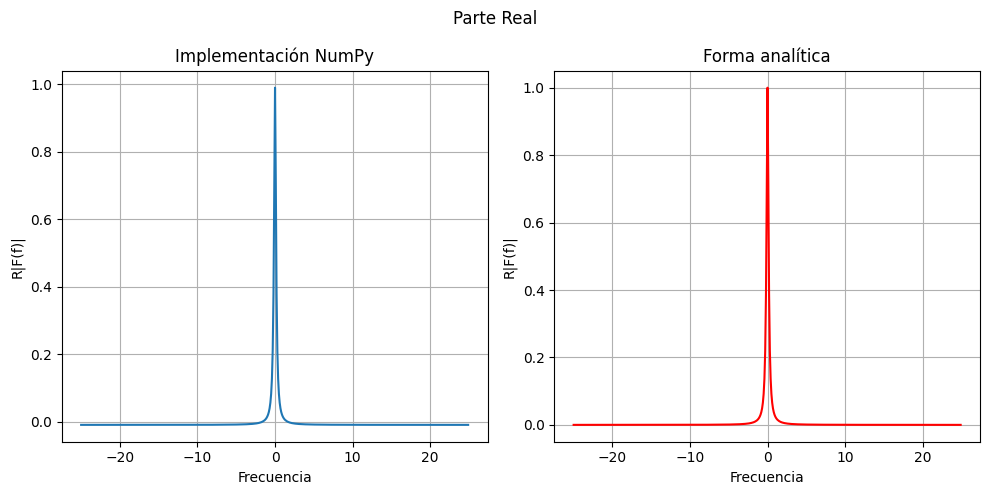

In [15]:
# Se crean las gráficas
fig2 = plt.figure()
plt.figure(figsize=(10,5))
plt.suptitle('Parte Real')

#Gráficas de la parte real
plt.subplot(1,2,1)
plt.title('Implementación NumPy')
plt.plot(frecuencia_ord,F_ord.real)
plt.xlabel('Frecuencia')
plt.ylabel('R|F(f)|')
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Forma analítica')
plt.plot(frecuencia_ord,F_R, c = 'red')
plt.xlabel('Frecuencia')
plt.ylabel('R|F(f)|')
plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

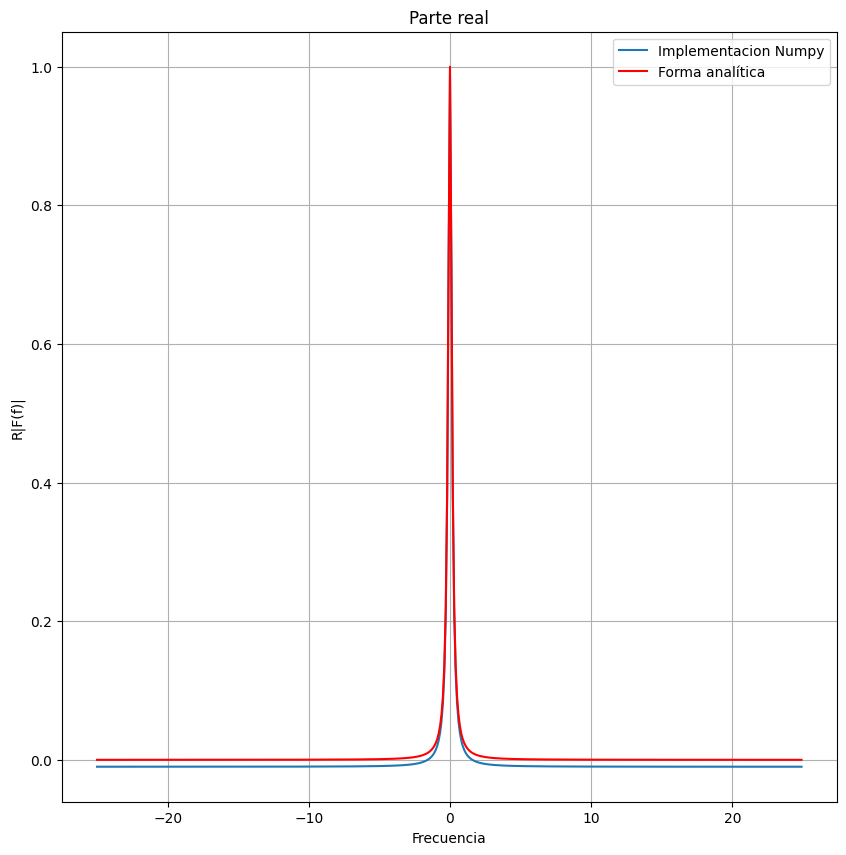

In [16]:
# Se crean las gráficas
fig2 = plt.figure()
plt.figure(figsize=(10,10))
plt.title('Parte real')
plt.plot(frecuencia_ord,F_ord.real, label = 'Implementacion Numpy')
plt.plot(frecuencia_ord,F_R, c  ='red', label = 'Forma analítica')
plt.xlabel('Frecuencia')
plt.ylabel('R|F(f)|')
plt.grid(True)
plt.legend()
plt.show()

##### Espectro de fase

<Figure size 640x480 with 0 Axes>

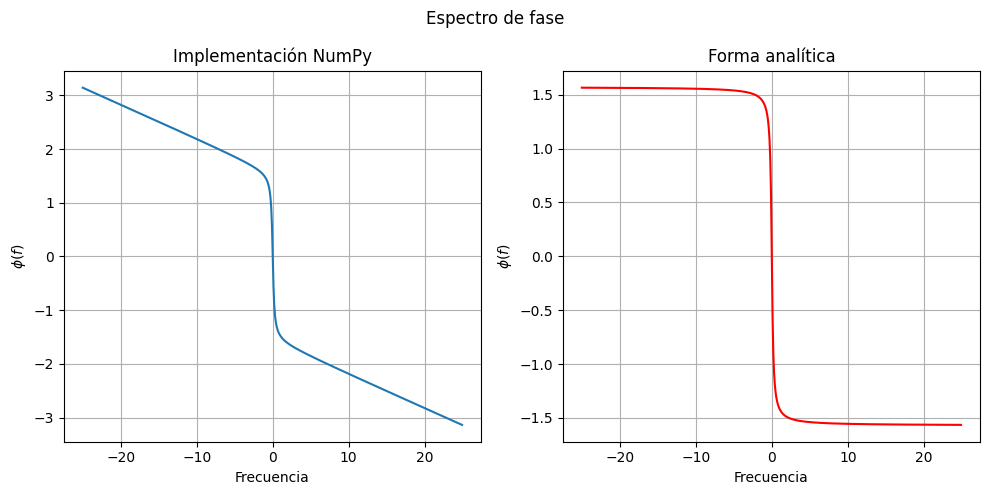

In [17]:
# Se crean las gráficas
fig2 = plt.figure()
plt.figure(figsize=(10,5))
plt.suptitle('Espectro de fase')

#Gráfica del espectro de fase
plt.subplot(1,2,1)
plt.title('Implementación NumPy')
plt.plot(frecuencia_ord,np.angle(F_ord))
plt.xlabel('Frecuencia')
plt.ylabel(r'$\phi(f)$')
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Forma analítica')
plt.plot(frecuencia_ord,F_phase, c = 'red')
plt.xlabel('Frecuencia')
plt.ylabel(r'$\phi(f)$')
plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

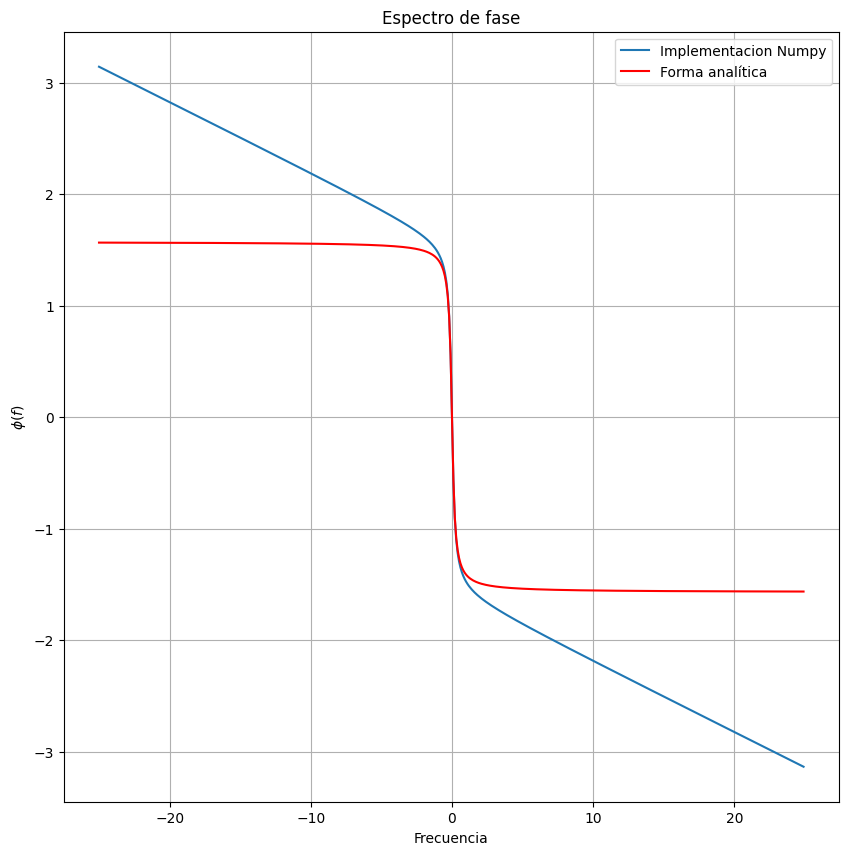

In [18]:
# Se crean las gráficas
fig2 = plt.figure()
plt.figure(figsize=(10,10))
plt.title('Espectro de fase')
plt.plot(frecuencia_ord,np.angle(F_ord), label = 'Implementacion Numpy')
plt.plot(frecuencia_ord,F_phase, c  ='red', label = 'Forma analítica')
plt.xlabel('Frecuencia')
plt.ylabel(r'$\phi(f)$')
plt.grid(True)
plt.legend()
plt.show()

##### Parte Imaginaria

<Figure size 640x480 with 0 Axes>

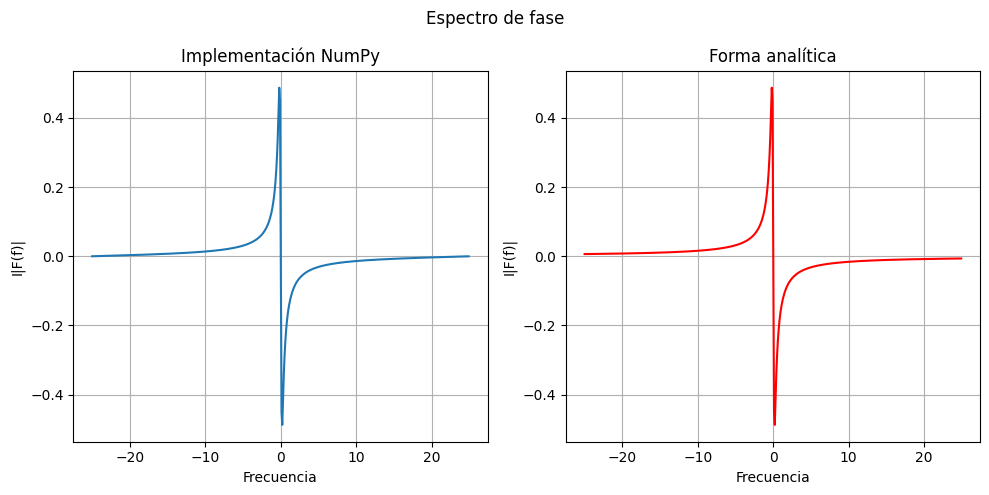

In [19]:
# Se crean las gráficas
fig2 = plt.figure()
plt.figure(figsize=(10,5))
plt.suptitle('Espectro de fase')

#Gráfica del espectro de fase
plt.subplot(1,2,1)
plt.title('Implementación NumPy')
plt.plot(frecuencia_ord,F_ord.imag)
plt.xlabel('Frecuencia')
plt.ylabel('I|F(f)|')
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Forma analítica')
plt.plot(frecuencia_ord,F_I, c = 'red')
plt.xlabel('Frecuencia')
plt.ylabel('I|F(f)|')
plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

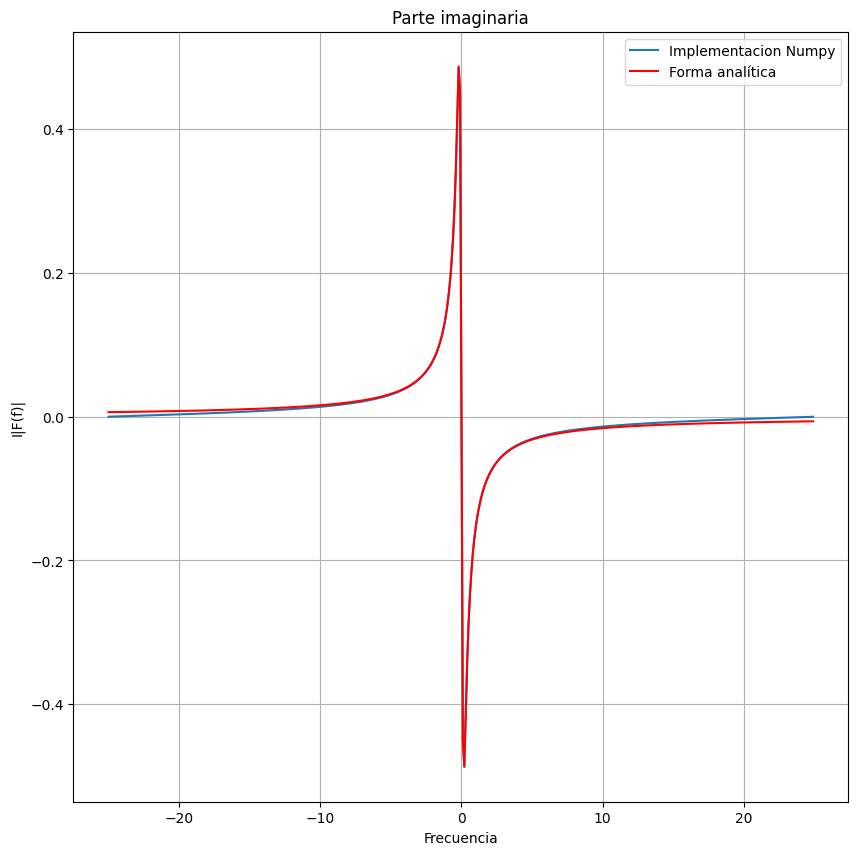

In [20]:
# Se crean las gráficas
fig2 = plt.figure()
plt.figure(figsize=(10,10))
plt.title('Parte imaginaria')
plt.plot(frecuencia_ord,F_ord.imag, label = 'Implementacion Numpy')
plt.plot(frecuencia_ord,F_I, c  ='red', label = 'Forma analítica')
plt.xlabel('Frecuencia')
plt.ylabel('I|F(f)|')
plt.grid(True)
plt.legend()
plt.show()